Part 2: Qualitative Analysis
Create a presentation using Google Slides (max. 5 slides) using the data above (and additional data from those tables) that make clear recommendations on how people can create a successful Kickstarter campaign.

* **What type of projects would be most successful at getting funded?**

In [190]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
from tools.helpers import read_json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 3]

In [192]:
in_csv = 'data/input/DSI_kickstarterscrape_dataset.csv'
df = pd.read_csv(in_csv, encoding="ISO-8859-1")
# if need to convert back to utf-8 https://stackoverflow.com/questions/42456867/convert-pandas-dataframe-to-utf8

df = df.rename(columns=lambda x: x.replace(' ', '_'))
df['uid'] = df.index + 1

In [193]:
# bar plot of categories and percent that got successful funding. 

In [194]:
dfk = df[(df.status != 'live')].copy()

dfk['Final Status'] = np.where(dfk['status']=='successful', 'successful', 'unsuccessful')

dfs = dfk[['category', 'subcategory', 'Final Status', 'uid']]

In [195]:
dfsg = dfs.groupby(['category', 'Final Status'], as_index=False).count()

In [196]:
dfsg

,category,Final Status,subcategory,uid
0,Art,successful,2106,2106
1,Art,unsuccessful,1585,1585
2,Comics,successful,520,520
3,Comics,unsuccessful,448,448
4,Dance,successful,527,527
5,Dance,unsuccessful,180,180
6,Design,successful,729,729
7,Design,unsuccessful,841,841
8,Fashion,successful,335,335
9,Fashion,unsuccessful,684,684


In [197]:
colors = {'successful': 'dodgerblue', 'unsuccessful': 'red', }

/Users/danielmsheehan/Documents/GitHub/general_assembly_data_analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/danielmsheehan/Documents/GitHub/general_assembly_data_analysis/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 0, 'Campaign Category')

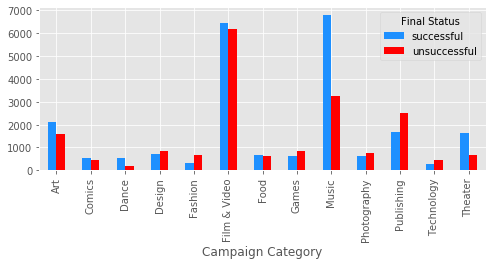

In [198]:
dfs['category'] = np.where(dfs['category']=='Film &amp; Video', 'Film & Video', dfs['category'])

dfp = dfs.copy()

dfs[['uid', 'category', 'Final Status']].groupby(['category', 'Final Status']).count()['uid'].unstack().plot.bar(colors=dfs['Final Status'].apply(lambda x: colors[x]))

plt.xlabel('Campaign Category')
#plt.xticks([0., 1., 2., 3., 4., 5., 6.])  f.plot.bar(x='lab', y='val', rot=0)

In [199]:
dfsc = dfs[['uid', 'category', 'Final Status']].groupby(['category', 'Final Status']).count()

dfsc

uid
category     Final Status      
Art          successful    2106
             unsuccessful  1585
Comics       successful     520
             unsuccessful   448
Dance        successful     527
             unsuccessful   180
Design       successful     729
             unsuccessful   841
Fashion      successful     335
             unsuccessful   684
Film & Video successful    6423
             unsuccessful  6196
Food         successful     655
             unsuccessful   646
Games        successful     635
             unsuccessful   842
Music        successful    6792
             unsuccessful  3270
Photography  successful     645
             unsuccessful   742
Publishing   successful    1671
             unsuccessful  2494
Technology   successful     289
             unsuccessful   451
Theater      successful    1642
             unsuccessful   680

Text(0.5, 0, 'Campaign Sub-Category')

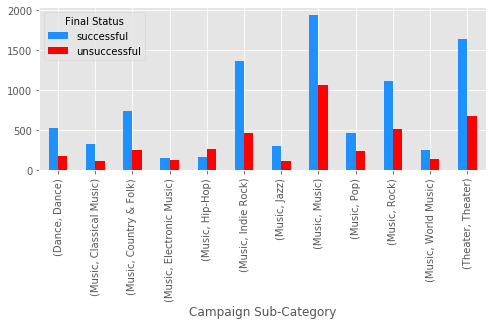

In [206]:
dfp['subcategory'] = np.where(dfp['subcategory']=='Film &amp; Video', 'Film & Video', dfp['subcategory'])
dfp['subcategory'] = np.where(dfp['subcategory']=='Country &amp; Folk', 'Country & Folk', dfp['subcategory'])

dfpx = dfp[(dfp.category == 'Music') | (dfp.category == 'Theater') | (dfp.category == 'Dance')].copy()

colors = {'successful': 'dodgerblue', 'unsuccessful': 'red'}

dfpx[['uid', 'category', 'subcategory', 'Final Status']].groupby(['category', 'subcategory', 'Final Status']).count()['uid'].unstack().plot.bar(colors=['dodgerblue', 'red'])

plt.xlabel('Campaign Sub-Category')

In [202]:
dfpx[['uid', 'category', 'subcategory', 'Final Status']].groupby(['category', 'subcategory', 'Final Status']).count()

uid
category subcategory      Final Status      
Dance    Dance            successful     527
                          unsuccessful   180
Music    Classical Music  successful     321
                          unsuccessful   111
         Country & Folk   successful     739
                          unsuccessful   252
         Electronic Music successful     152
                          unsuccessful   119
         Hip-Hop          successful     160
                          unsuccessful   262
         Indie Rock       successful    1358
                          unsuccessful   460
         Jazz             successful     299
                          unsuccessful   116
         Music            successful    1945
                          unsuccessful  1062
         Pop              successful     457
                          unsuccessful   235
         Rock             successful    1117
                          unsuccessful   514
         World Music      successful     244
                          unsuccessful   139
Theater  Theater          successful    1642
                          unsuccessful   680